In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm

By Aldous Jeon and Niketh Gorla

In [74]:
df=pd.read_csv('pkmn.csv')
df.head()

,Name,Move1,Move2,Move3,Move4,Item,Ability
0,Gastrodon,Earth Power,Icy Wind,Yawn,Protect,Leftovers,Storm Drain
1,Calyrex,Astral Barrage,Snarl,Will-O-Wisp,Protect,Focus Sash,As One
2,Rillaboom,Grassy Glide,Fake Out,Knock Off,High Horsepower,Assault Vest,Grassy Surge
3,Incineroar,Flare Blitz,Parting Shot,Fake Out,Throat Chop,Safety Goggles,Intimidate
4,Thundurus,Wild Charge,Taunt,Fly,Protect,Life Orb,Defiant


Prepping Itemsets

In [75]:
n = len(df)
names = []
teamDict = {}
moveDict = {}
itemDict = {}
abilityDict = {}
occurDict = {}
moveOccurDict = {}
itemOccurDict = {}
abilityOccurDict = {}


def FindOcurrances(df):
    retDict = {}
    moveDict = {}
    itemDict = {}
    abilityDict = {}
    pkmnOccurDict = {}
    moveOccurDict = {}
    itemOccurDict = {}
    abilityOccurDict = {}

    teamFromDf = []
    for i in range(n):
        # there's a new pokemon team to record
        if(i % 6 == 0 and i != 0):

            for j in range(6):
                for l in range(j+1, 6):
                    if((teamFromDf[j], teamFromDf[l]) in retDict.keys()):
                        retDict[(teamFromDf[j], teamFromDf[l])] += 1
                    elif((teamFromDf[l], teamFromDf[j]) in retDict.keys()):
                        retDict[(teamFromDf[l], teamFromDf[j])] += 1
                    else:
                        retDict.update({(teamFromDf[j], teamFromDf[l]): 1})
                    #print((teamFromDf[j], teamFromDf[l]))

            teamFromDf.clear()

        curRow = df.iloc[i]
        # add pokemon to the team that we're looking at
        teamFromDf.append(curRow['Name'])

        if(curRow['Name'] in pkmnOccurDict.keys()):
            pkmnOccurDict[curRow['Name']] += 1
        else:
            pkmnOccurDict.update({curRow['Name']: 1})
            # print(curRow['Name'])

        # for each pokemon, add a relation to the move
        # move 1
        if((curRow['Name'], curRow['Move1']) in moveDict.keys()):
            moveDict[(curRow['Name'], curRow['Move1'])] += 1
        else:
            moveDict.update({(curRow['Name'], curRow['Move1']): 1})

        if(curRow['Move1'] in moveOccurDict.keys()):
            moveOccurDict[curRow['Move1']] += 1
        else:
            moveOccurDict.update({curRow['Move1']: 1})
            
        #print(curRow['Move1'])

        # move 2
        if((curRow['Name'], curRow['Move2']) in moveDict.keys()):
            moveDict[(curRow['Name'], curRow['Move2'])] += 1
        else:
            moveDict.update({(curRow['Name'], curRow['Move2']): 1})

        if(curRow['Move2'] in moveOccurDict.keys()):
            moveOccurDict[curRow['Move2']] += 1
        else:
            moveOccurDict.update({curRow['Move2']: 1})

        # move 3
        if((curRow['Name'], curRow['Move3']) in moveDict.keys()):
            moveDict[(curRow['Name'], curRow['Move3'])] += 1
        else:
            moveDict.update({(curRow['Name'], curRow['Move3']): 1})

        if(curRow['Move3'] in moveOccurDict.keys()):
            moveOccurDict[curRow['Move3']] += 1
        else:
            moveOccurDict.update({curRow['Move3']: 1})

        # move 4
        if((curRow['Name'], curRow['Move4']) in moveDict.keys()):
            moveDict[(curRow['Name'], curRow['Move4'])] += 1
        else:
            moveDict.update({(curRow['Name'], curRow['Move4']): 1})

        if(curRow['Move4'] in moveOccurDict.keys()):
            moveOccurDict[curRow['Move4']] += 1
        else:
            moveOccurDict.update({curRow['Move4']: 1})

        # relation to items
        if((curRow['Name'], curRow['Item']) in itemDict.keys()):
            itemDict[(curRow['Name'], curRow['Item'])] += 1
        else:
            itemDict.update({(curRow['Name'], curRow['Item']): 1})

        if(curRow['Item'] in itemOccurDict.keys()):
            itemOccurDict[curRow['Item']] += 1
        else:
            itemOccurDict.update({curRow['Item']: 1})

        #if(curRow['Name']=='Gastrodon'): print(curRow['Ability'])
        # relation to ability
        if((curRow['Name'], curRow['Ability']) in abilityDict.keys()):
            abilityDict[(curRow['Name'], curRow['Ability'])] += 1
        else:
            abilityDict.update({(curRow['Name'], curRow['Ability']): 1})

        if(curRow['Ability'] in abilityOccurDict.keys()):
            abilityOccurDict[curRow['Ability']] += 1
        else:
            abilityOccurDict.update({curRow['Ability']: 1})

    return retDict, moveDict, itemDict, abilityDict, pkmnOccurDict, moveOccurDict,itemOccurDict,abilityOccurDict


def Conf(dfDict, occurDict, strKey, strThing):

    supp = dfDict[(strKey, strThing)]
    n = occurDict[strKey]

    # print(supp)
    # print(n)
    return supp/n


def FreqMovesCand(pkmnName, s):
    # move 1 catalogue
    freqmoves = [nm for nm in moveOccurDict.keys() if (moveOccurDict[nm] >= s)]

    # find the moves most frequently associated
    freqPkmnMoves = []
    for nm in freqmoves:
        if((pkmnName, nm) in moveDict.keys() and moveDict[(pkmnName, nm)] >= s):
            freqPkmnMoves.append((pkmnName, nm, moveDict[(pkmnName, nm)]))

    return freqPkmnMoves


def FreqPairCand(pkmnName, s):
    # start with pokemon on a team
    freqPkmn = [nm for nm in names if (occurDict[nm] >= s)]

    # print(freqPkmn)

    # find the list of freq pokemon
    freqPkmnPairs = []
    for nm in freqPkmn:
        if((pkmnName!= nm) and(((pkmnName, nm) in teamDict.keys() and teamDict[(pkmnName, nm)] >= s) )):
            freqPkmnPairs.append((pkmnName, nm, teamDict[(pkmnName, nm)]))
        elif((pkmnName!= nm)and ((nm, pkmnName) in teamDict.keys() and teamDict[(nm, pkmnName)] >= s)):
            freqPkmnPairs.append((pkmnName, nm, teamDict[(nm,pkmnName)]))

    return freqPkmnPairs


def FreqItemsCand(pkmnName, s):
    # get items pokemon is frequently with
    freqItems = [nm for nm in itemOccurDict.keys() if (itemOccurDict[nm] >= s)]

    # print(freqPkmn)

    # find the list of freq pokemon
    freqItemPairs = []
    for nm in freqItems:
        if((pkmnName, nm) in itemDict.keys() and itemDict[(pkmnName, nm)] >= s):
            freqItemPairs.append((pkmnName, nm, itemDict[(pkmnName, nm)]))

    return freqItemPairs


def FreqAbilitiesCand(pkmnName, s):
    # get items pokemon is frequently with
    freqAbilities = [nm for nm in abilityOccurDict.keys() if (abilityOccurDict[nm] >= s)]

    # print(freqPkmn)

    # find the list of freq items
    freqAbilitiesPairs = []
    for nm in freqAbilities:
        if((pkmnName, nm) in abilityDict.keys() and abilityDict[(pkmnName, nm)] >= s):
            freqAbilitiesPairs.append(
                (pkmnName, nm, abilityDict[(pkmnName, nm)]))
    return freqAbilitiesPairs


[('Gastrodon', 6), ('Rillaboom', 7), ('Incineroar', 19), ('Zacian', 5), ('Grimmsnarl', 6), ('Porygon2', 7), ('Amoonguss', 7), ('Togekiss', 10), ('Dragapult', 11), ('Primarina', 5), ('Ferrothorn', 5)]


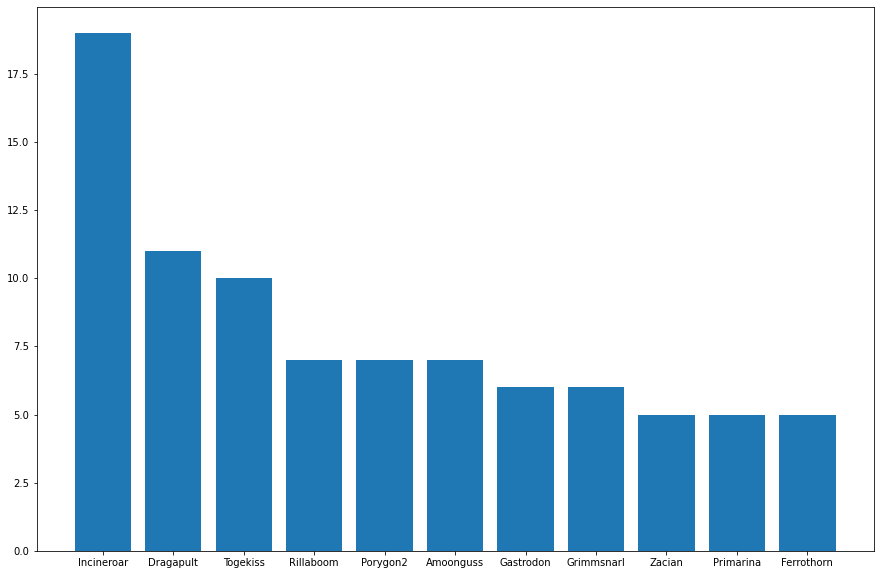

In [76]:
teamDict, moveDict, itemDict, abilityDict, occurDict, moveOccurDict,itemOccurDict,abilityOccurDict = FindOcurrances(df)

freqPkmn=[(nm,occurDict[nm]) for nm in occurDict.keys() if (occurDict[nm]>=5)]
# Convert the list to a NumPy array
sub_arr = np.array(freqPkmn)
print(freqPkmn)
 
# Extract the second column and convert it to integers
values = sub_arr[:, 1].astype(int)
 
# Sort the array by the second column (index 1)
sorted_arr = sub_arr[(-values).argsort()]
 
# Convert the sorted array back to a list
freqPkmn = sorted_arr.tolist()

df = pd.DataFrame(freqPkmn)
#Most Frequent Pokemon
sub_arr = np.array(freqPkmn)
values =np.array( sub_arr[:, 1].astype(int))

names = np.array(sub_arr[:, 0])


plt.figure(figsize=(15,10))
plt.bar( names, values)
plt.show()

Gastrodon


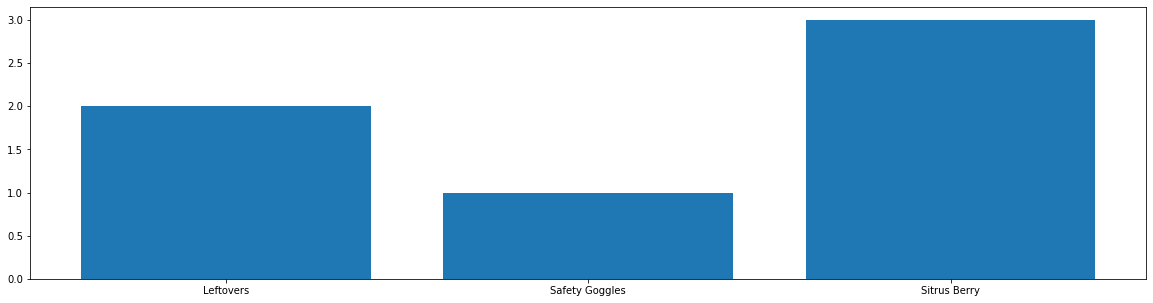

Gastrodon


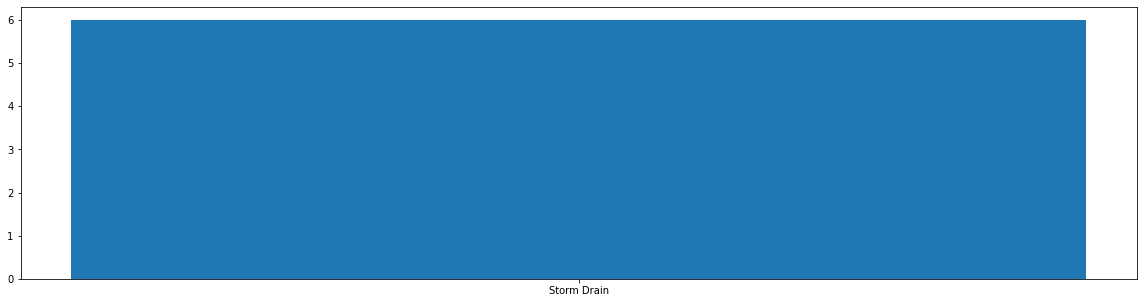

Gastrodon


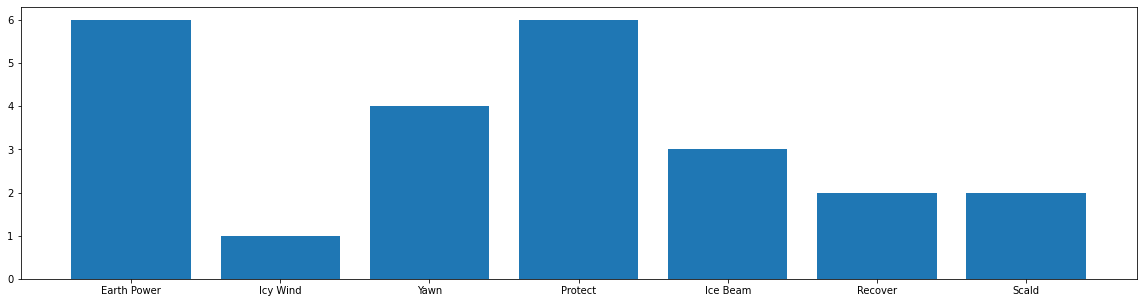

Gastrodon


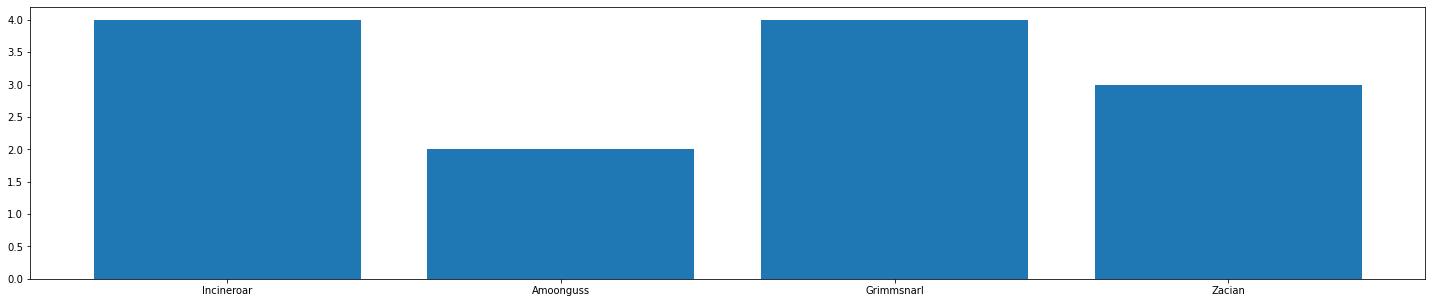

Rillaboom


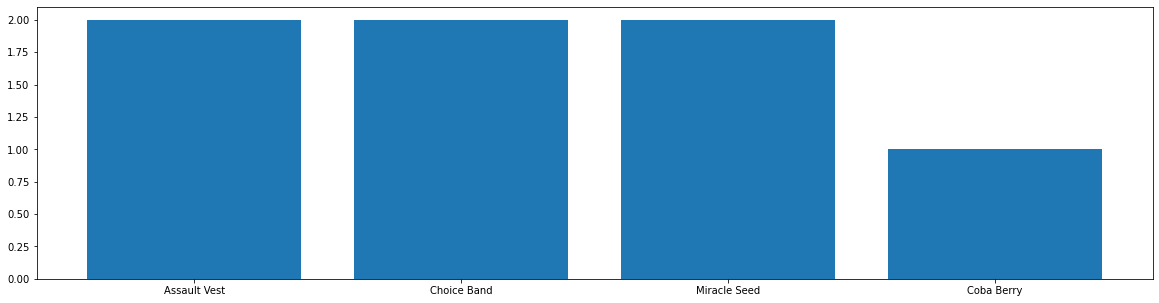

Rillaboom


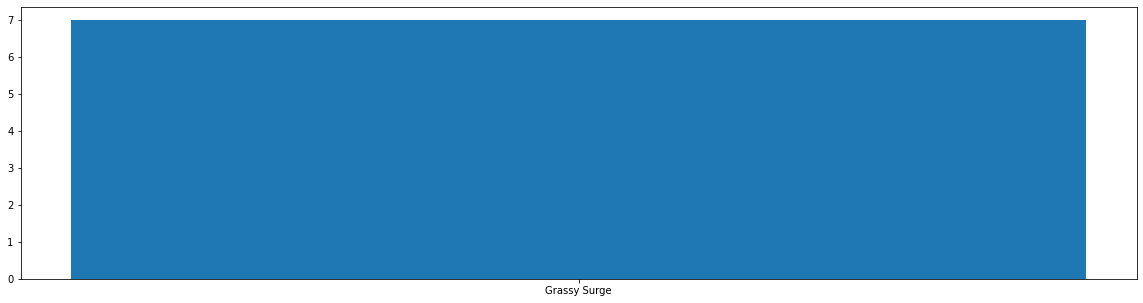

Rillaboom


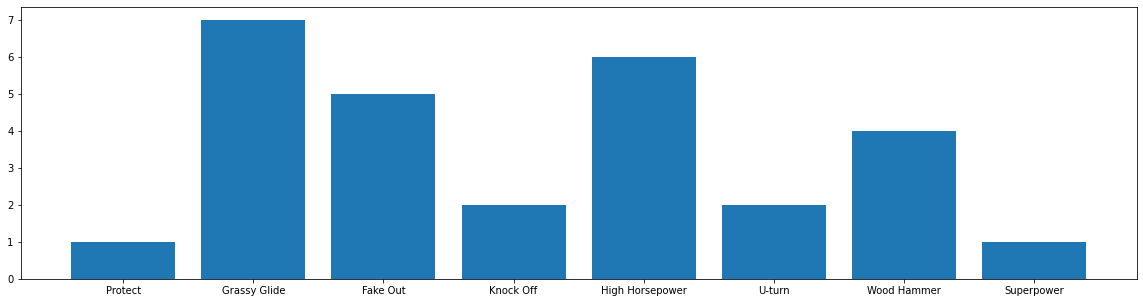

Rillaboom


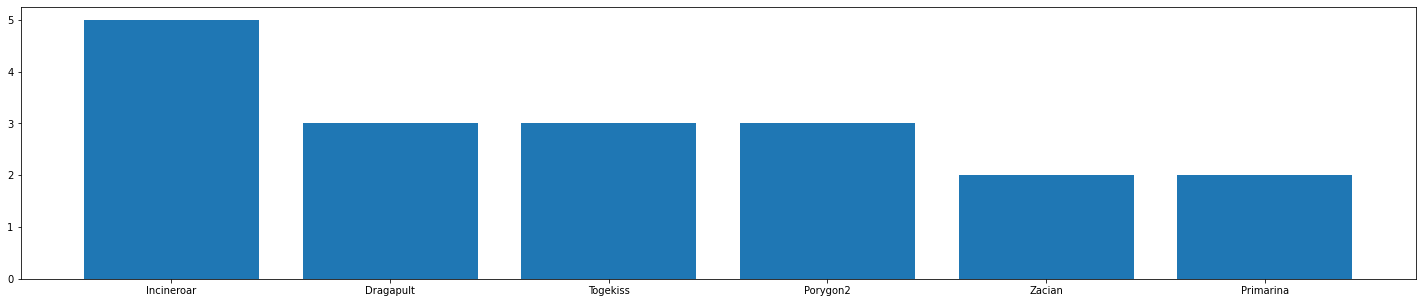

Incineroar


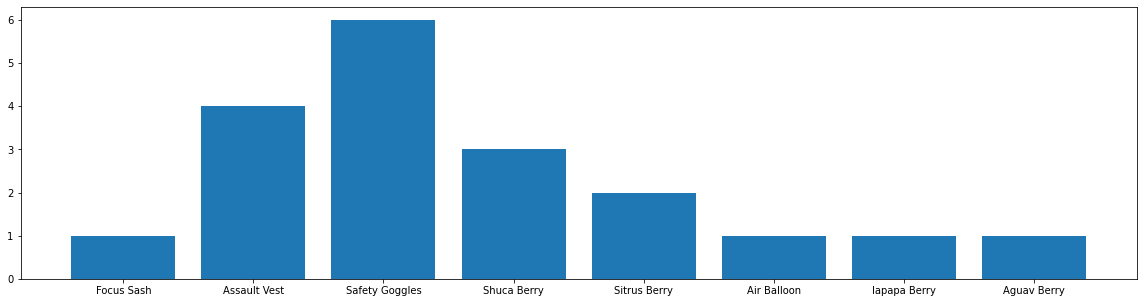

Incineroar


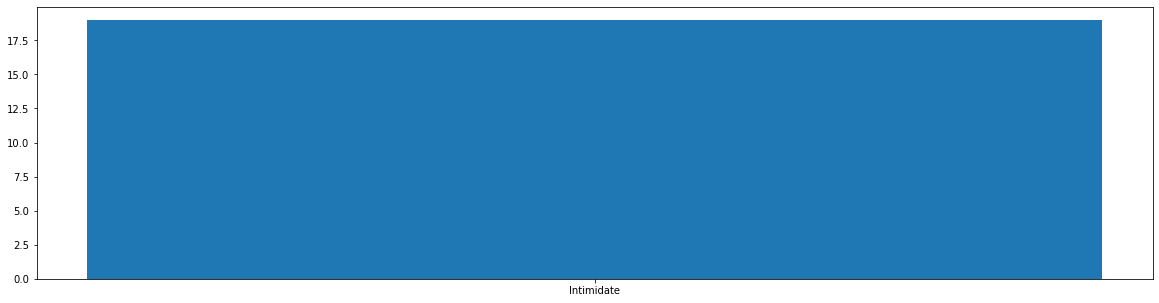

Incineroar


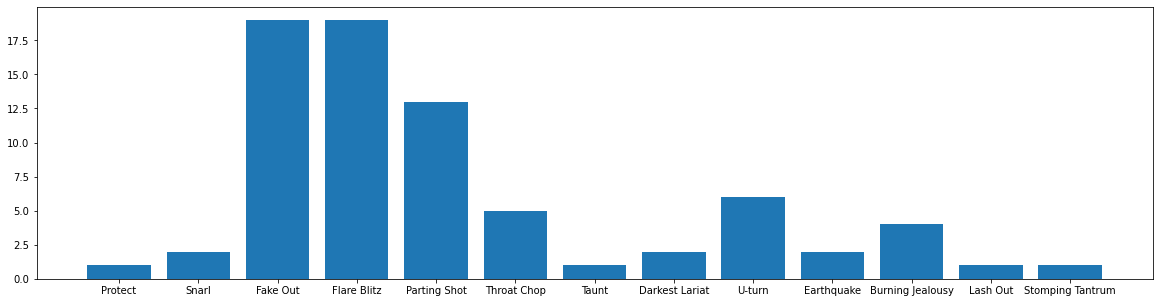

Incineroar


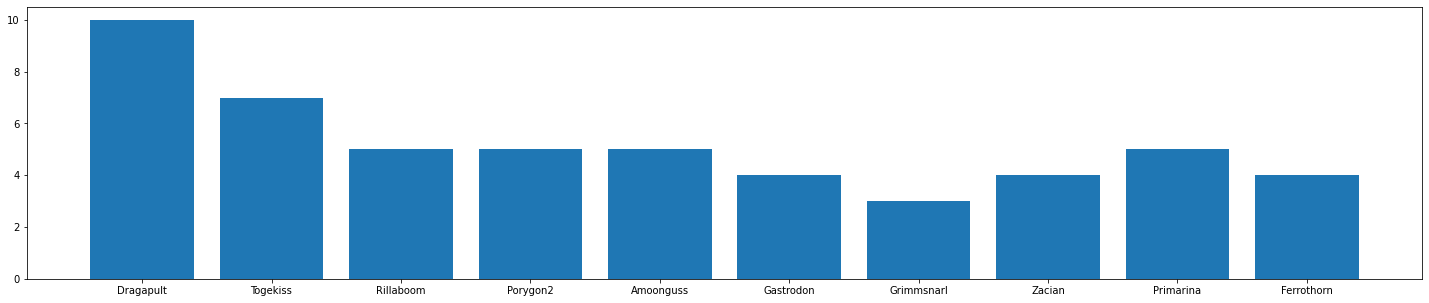

Zacian


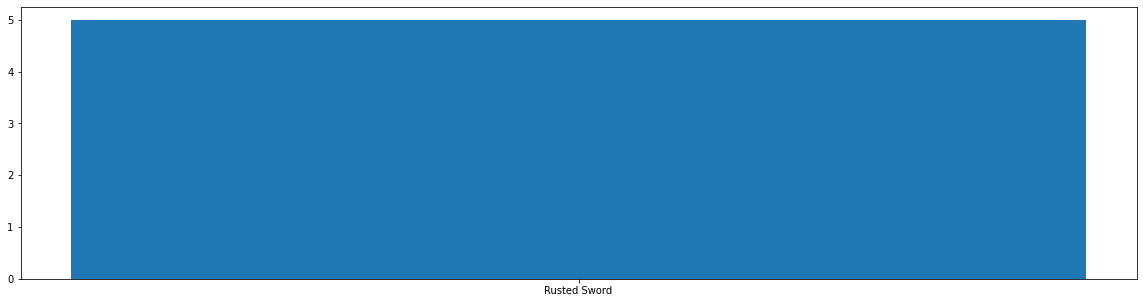

Zacian


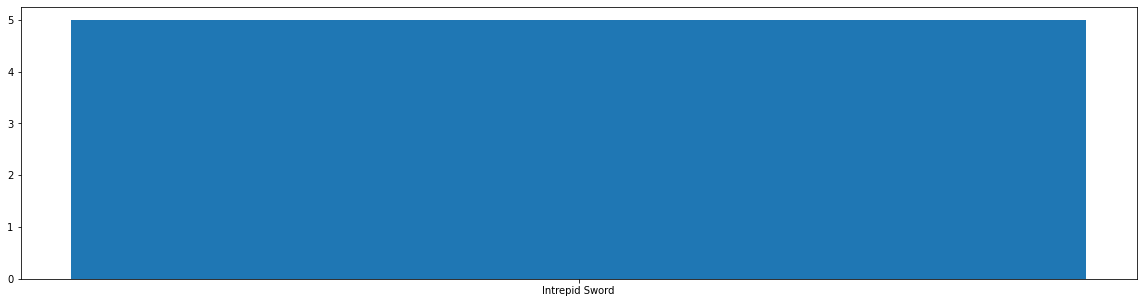

Zacian


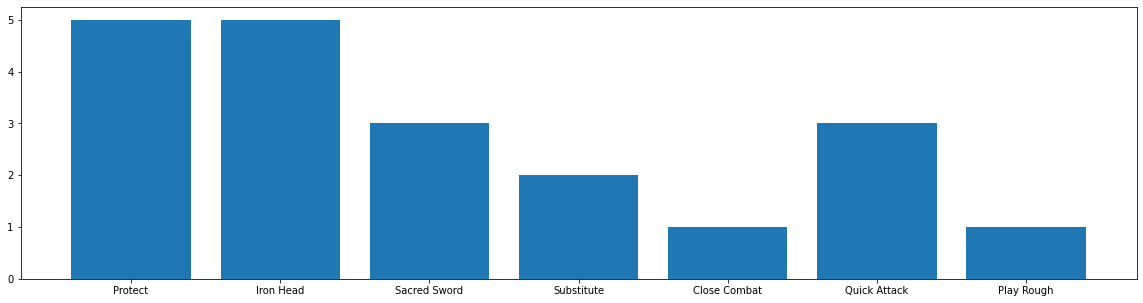

Zacian


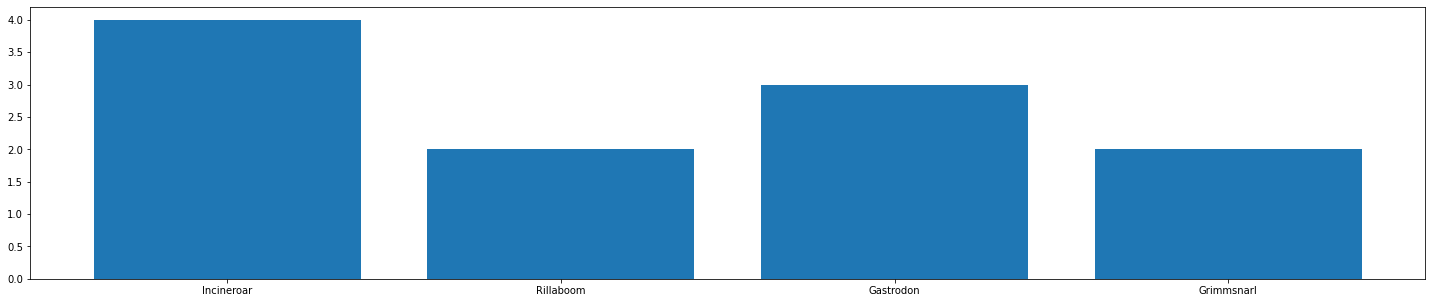

Grimmsnarl


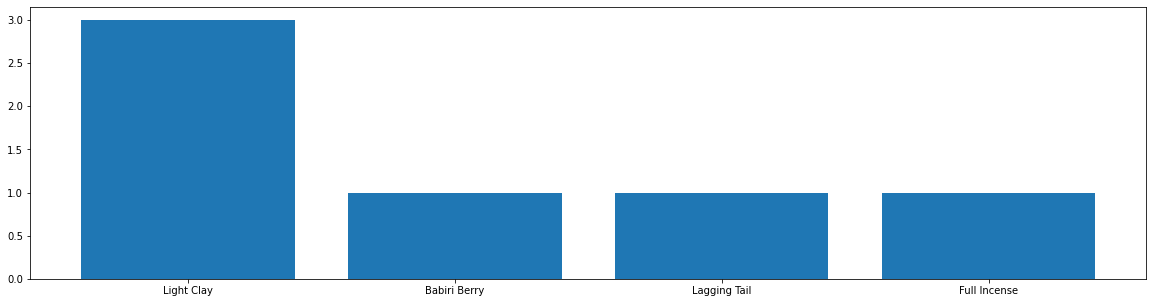

Grimmsnarl


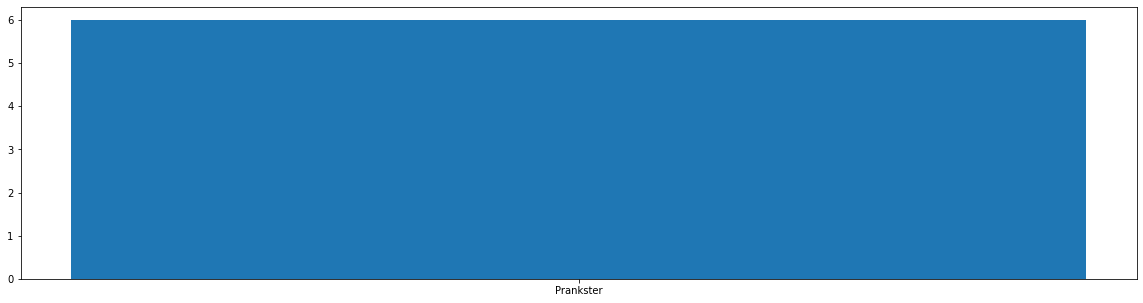

Grimmsnarl


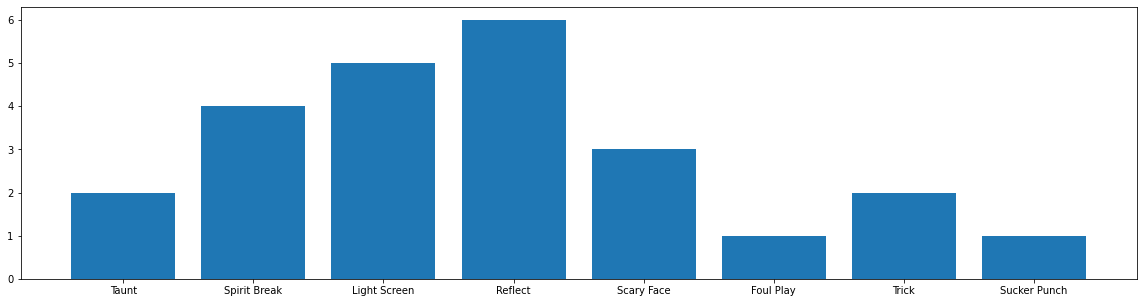

Grimmsnarl


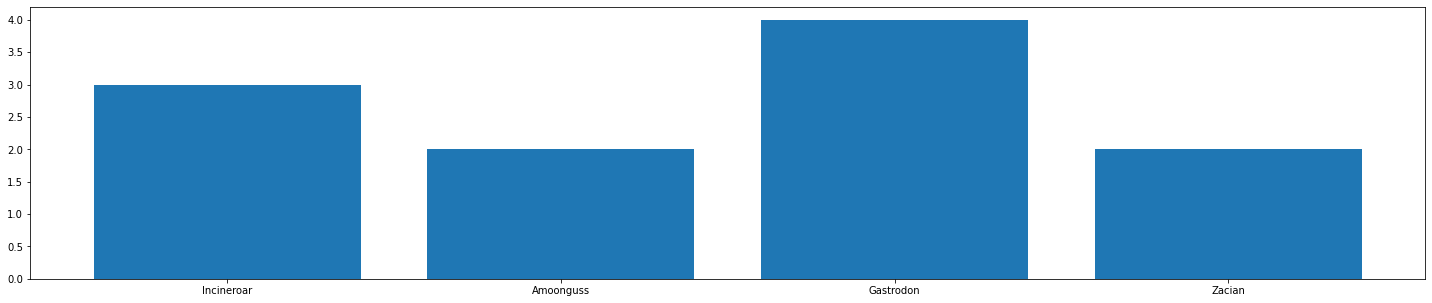

Porygon2


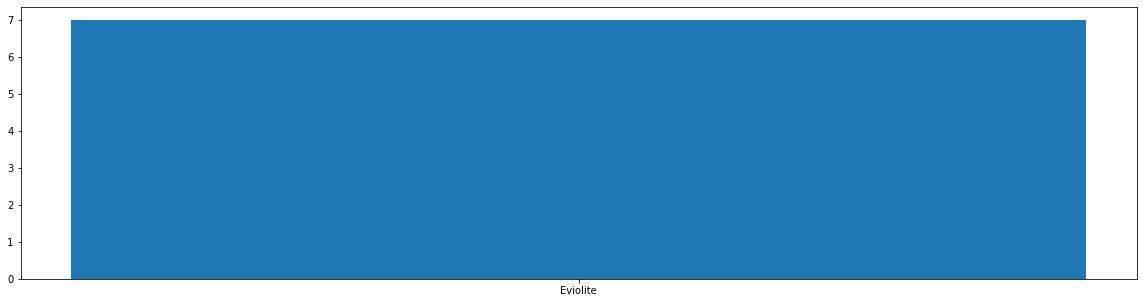

Porygon2


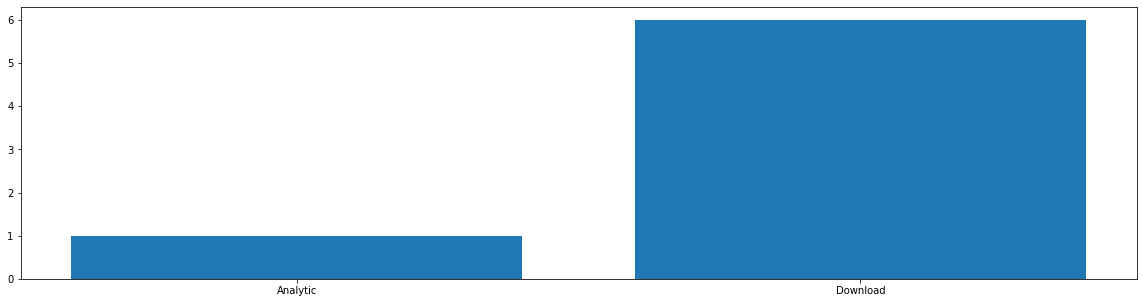

Porygon2


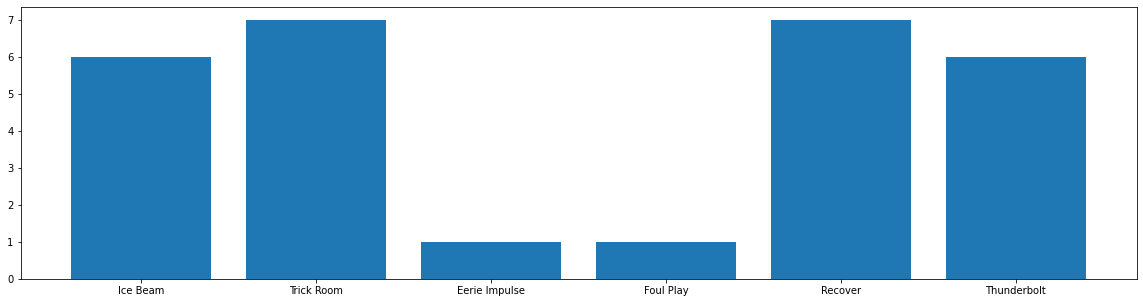

Porygon2


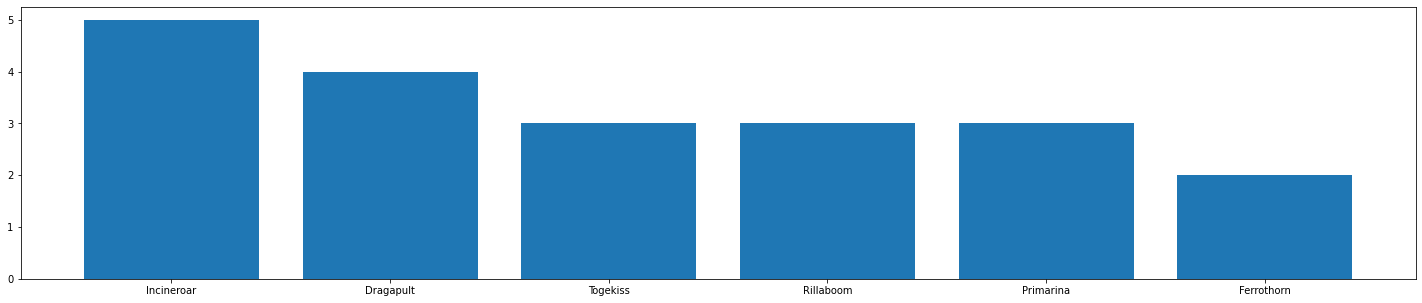

Amoonguss


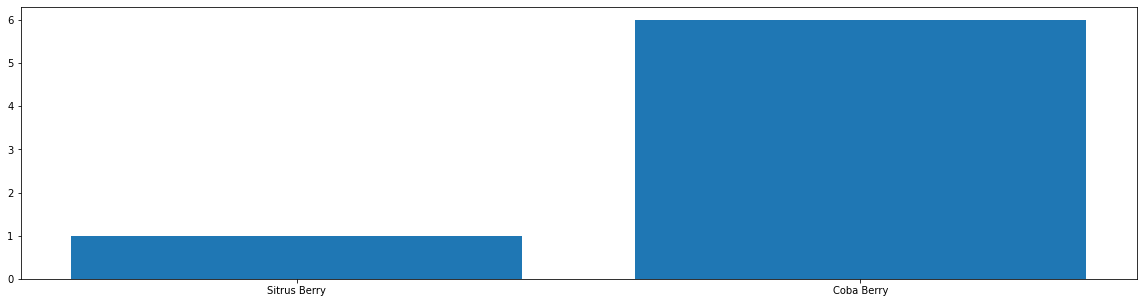

Amoonguss


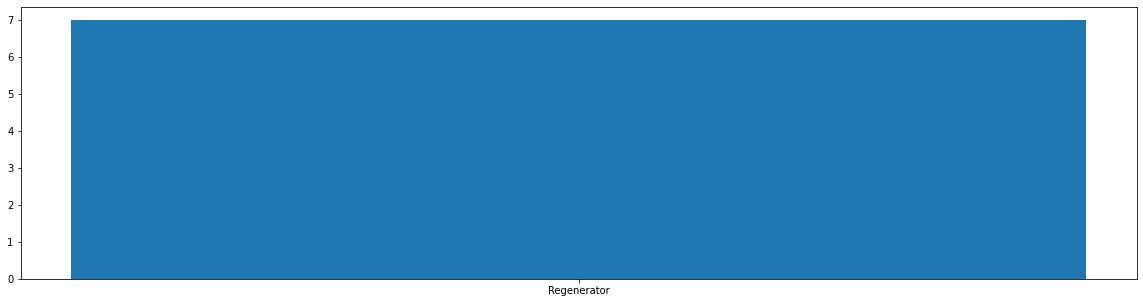

Amoonguss


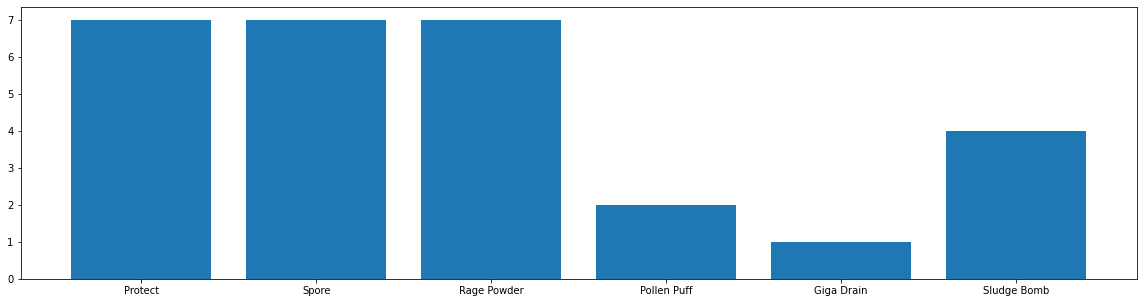

Amoonguss


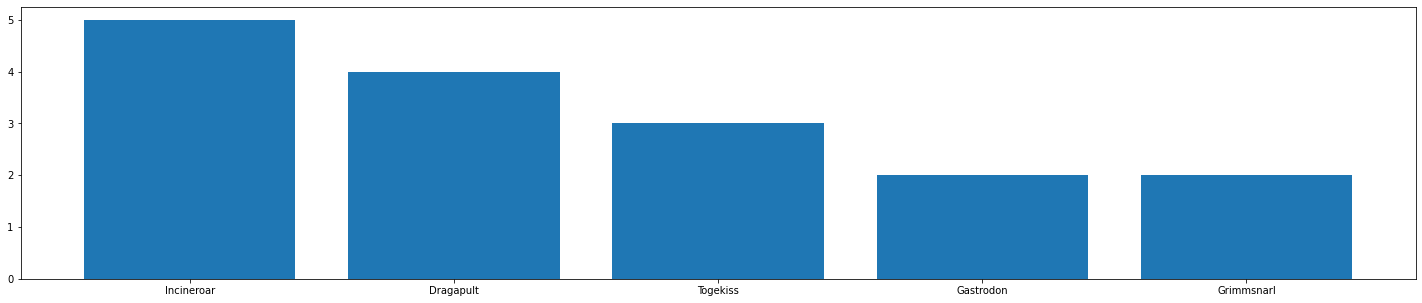

Togekiss


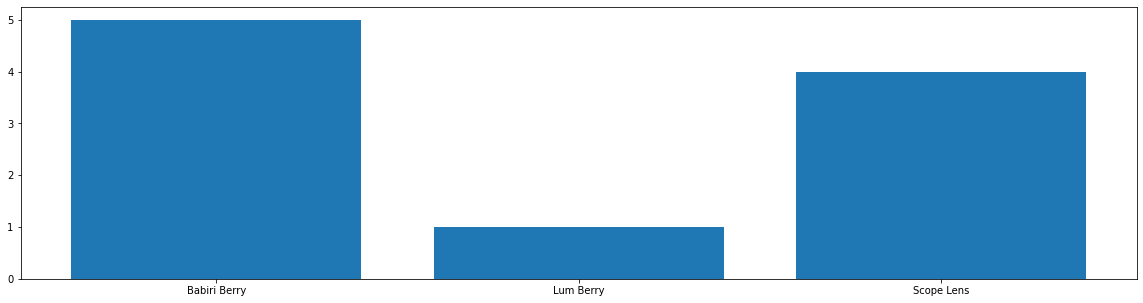

Togekiss


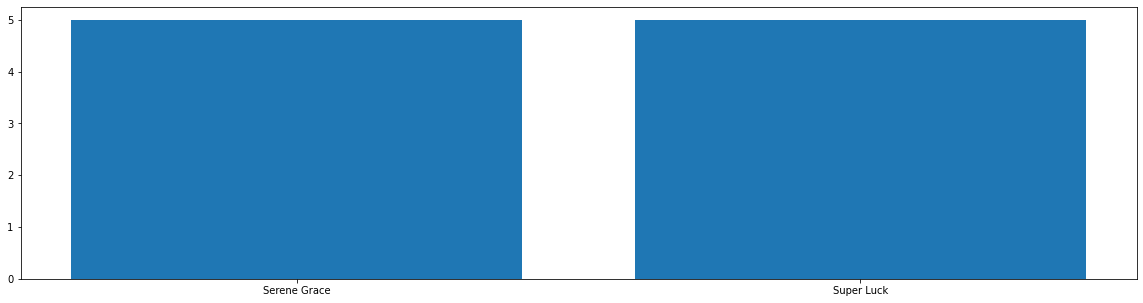

Togekiss


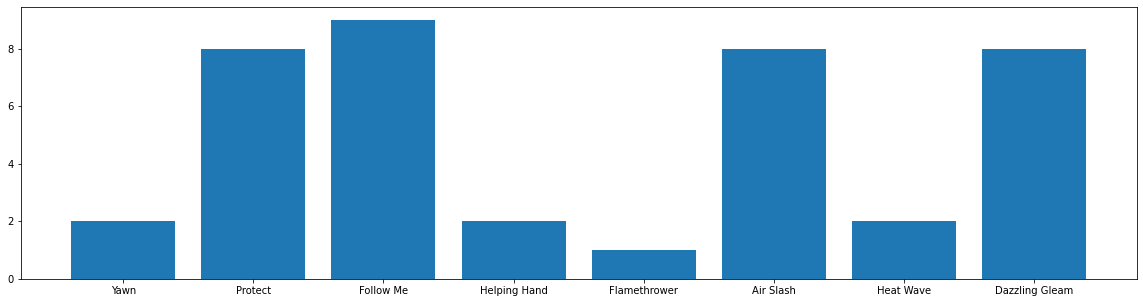

Togekiss


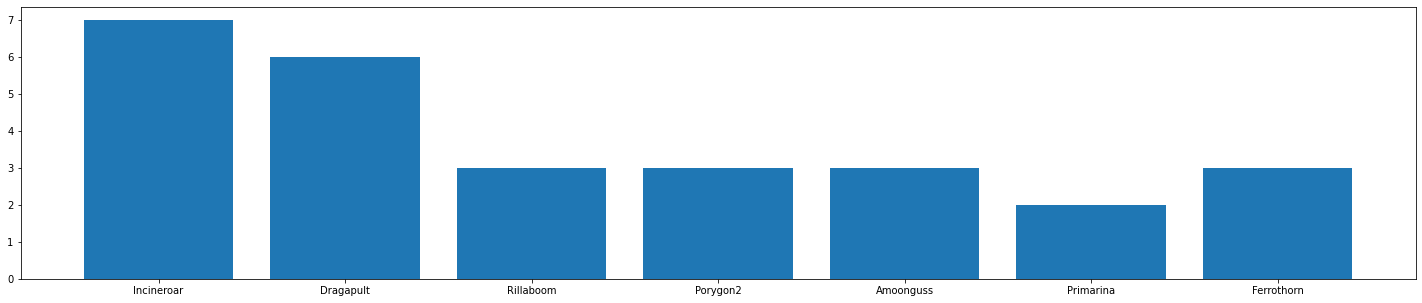

Dragapult


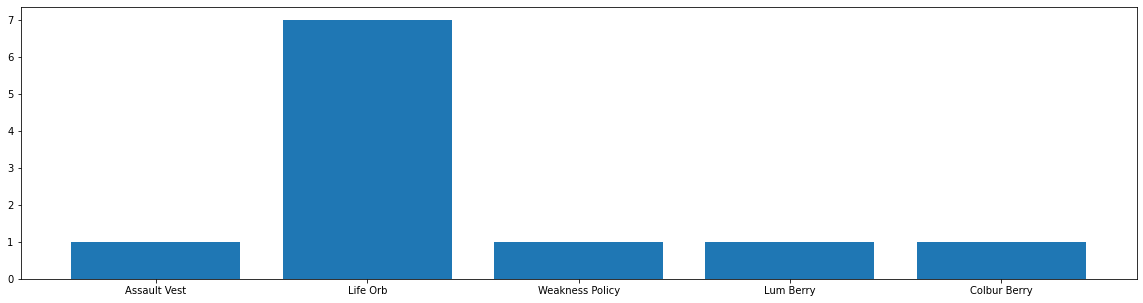

Dragapult


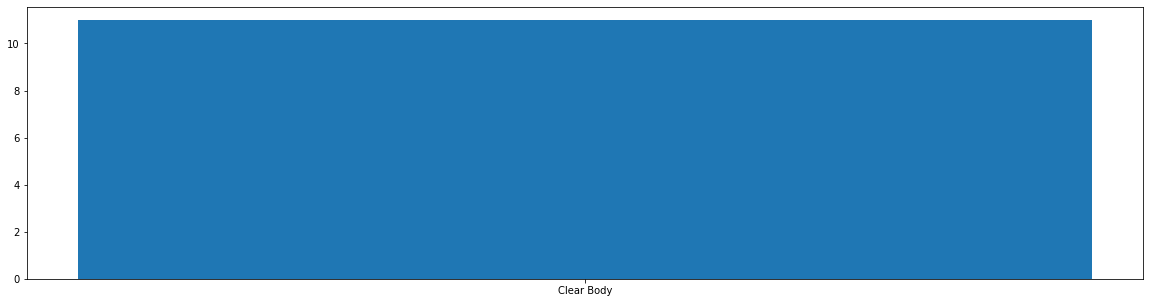

Dragapult


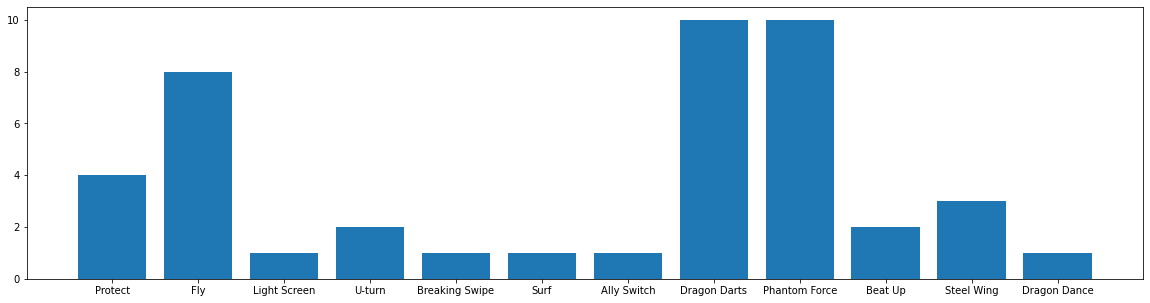

Dragapult


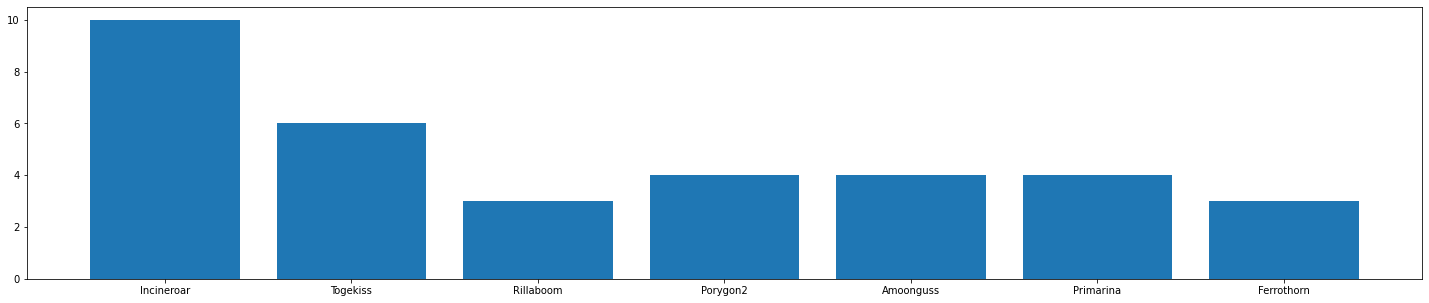

Primarina


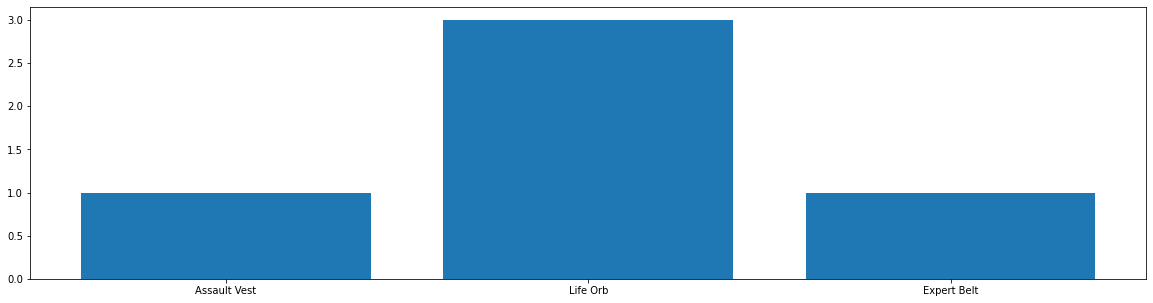

Primarina


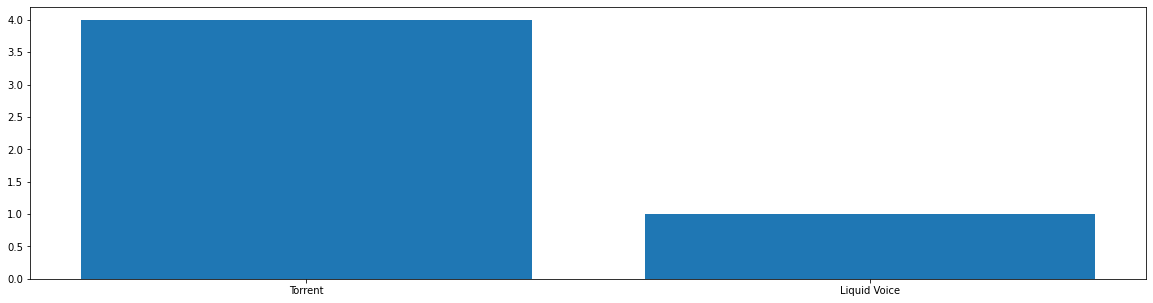

Primarina


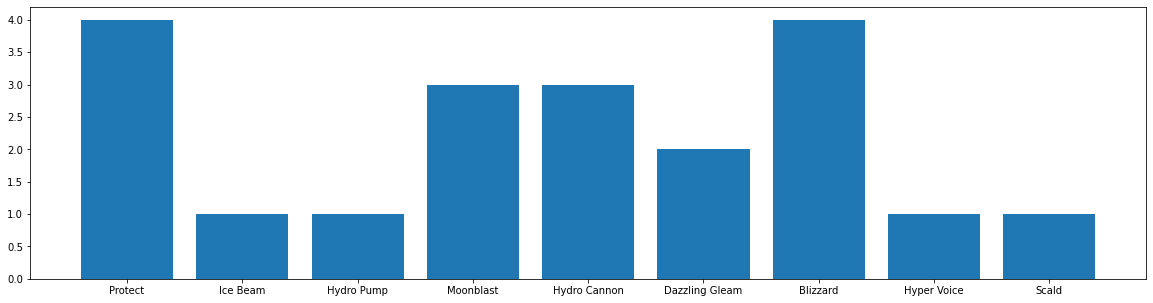

Primarina


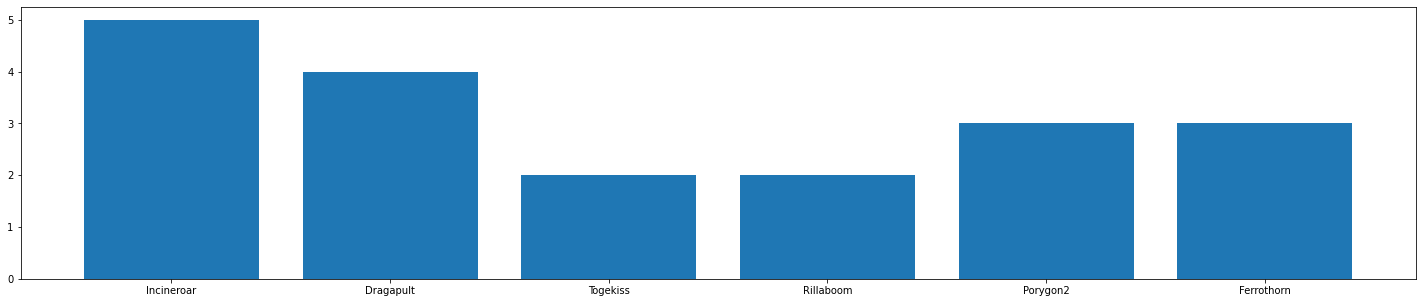

Ferrothorn


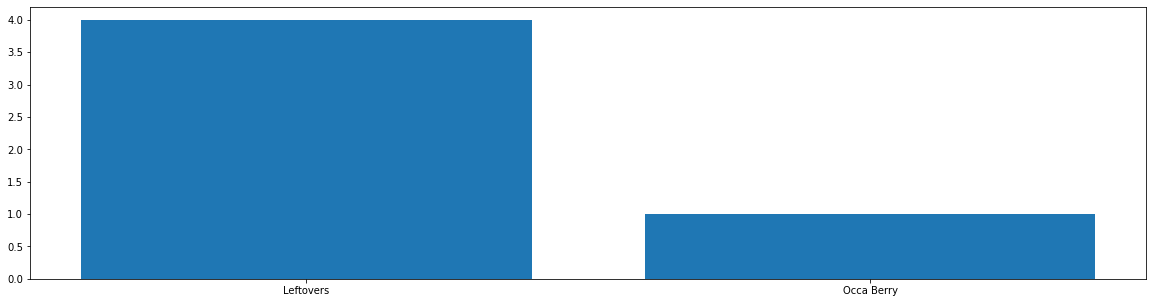

Ferrothorn


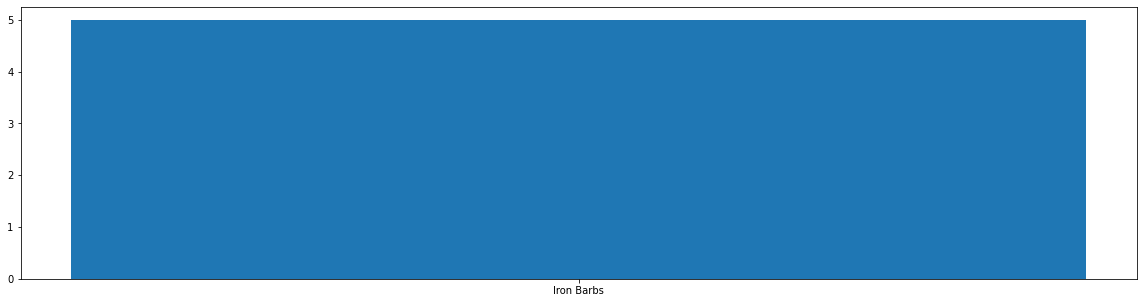

Ferrothorn


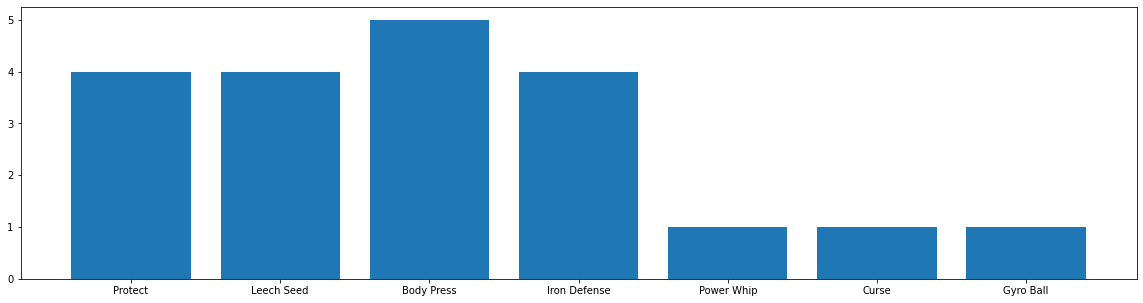

Ferrothorn


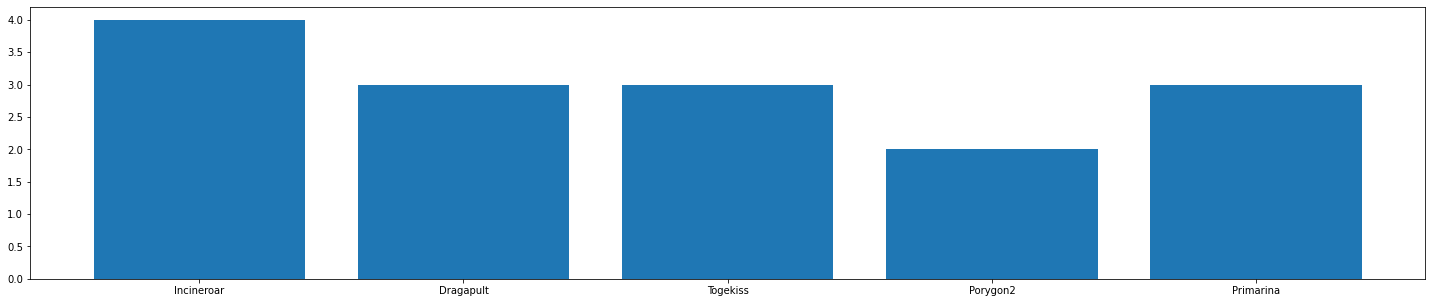

In [77]:

freqPkmn=[nm for nm in occurDict.keys() if (occurDict[nm]>=5)]


def ShowPopPkmnItems(pkmnName):
    pkmn=FreqItemsCand(pkmnName, 0)
    # Convert the list to a NumPy array
    sub_arr = np.array(pkmn)
    #print(sub_arr)
    # Extract the second column and convert it to integers
    values =np.array( sub_arr[:, 2].astype(int))
    # Extract the second column and convert it to integers
    names = np.array(sub_arr[:, 1])

    #print(len(values))
    #print(len(names))
    print(pkmnName)
    plt.figure(figsize=(20,5)) 
    plt.bar( names, values)

    plt.show()
    
def ShowPopPkmnAbilities(pkmnName):
    pkmn=FreqAbilitiesCand(pkmnName, 0)
    # Convert the list to a NumPy array
    sub_arr = np.array(pkmn)
    #print(sub_arr)
    # Extract the second column and convert it to integers
    values =np.array( sub_arr[:, 2].astype(int))
    # Extract the second column and convert it to integers
    names = np.array(sub_arr[:, 1])

    #print(len(values))
    #print(len(names))
    print(pkmnName)
    plt.figure(figsize=(20,5))
    plt.bar( names, values)
    plt.show()
    
def ShowPopPkmnMoves(pkmnName):
    pkmn=FreqMovesCand(pkmnName, 0)
    # Convert the list to a NumPy array
    sub_arr = np.array(pkmn)
    #print(sub_arr)
    # Extract the second column and convert it to integers
    values =np.array( sub_arr[:, 2].astype(int))
    # Extract the second column and convert it to integers
    names = np.array(sub_arr[:, 1])

    #print(len(values))
    #print(len(names))
    print(pkmnName)
    plt.figure(figsize=(20,5))
    plt.bar( names, values)
    plt.show()
    
def ShowPopPkmnTeams(pkmnName):
    pkmn=FreqPairCand(pkmnName, 2)
    # Convert the list to a NumPy array
    sub_arr = np.array(pkmn)
    #print(sub_arr)
    # Extract the second column and convert it to integers
    values =np.array( sub_arr[:, 2].astype(int))
    # Extract the second column and convert it to integers
    names = np.array(sub_arr[:, 1])

    #print(len(values))
    #print(len(names))
    print(pkmnName)
    plt.figure(figsize=(25,5))
    plt.bar( names, values)
    plt.show()
    
for nm in freqPkmn:
    ShowPopPkmnItems(nm)
    ShowPopPkmnAbilities(nm)
    ShowPopPkmnMoves(nm)
    ShowPopPkmnTeams(nm)


In [79]:
freqPkmn=[nm for nm in teamDict.keys() if (teamDict[nm]>=5)]

#print(freqPkmn)
df=pd.read_csv('pkmn.csv')
n = len(df)


#make list of unique
uniquePkmn=[]
for pair in freqPkmn:
    for thing in pair:
        if thing not in uniquePkmn:
            uniquePkmn.append(thing)

retDict=[]
retDictc=[]
teamFromDf = []
for l in range(n):
    # there's a new pokemon team to record
    if(l % 6 == 0 and l != 0):
    
        for i in range(len(uniquePkmn)):
            for j in range(i+1,len(uniquePkmn)):
                for k in range(j+1,len(uniquePkmn)):
                    if(uniquePkmn[i] in teamFromDf and uniquePkmn[j] in teamFromDf and uniquePkmn[k] in teamFromDf):
                        if((uniquePkmn[i],uniquePkmn[j],uniquePkmn[k]) in retDict):
                            retDictc[retDict.index((uniquePkmn[i],uniquePkmn[j],uniquePkmn[k]))]+=1
                        else:
                            retDict.append((uniquePkmn[i],uniquePkmn[j],uniquePkmn[k]))
                            retDictc.append(1)
                    
        teamFromDf.clear()

    curRow = df.iloc[l]
    # add pokemon to the team that we're looking at
    teamFromDf.append(curRow['Name'])
    
anyPkmn=[]
for i in range(len(retDict)):
    if(retDictc[i]>=4):
        anyPkmn.append( (retDict[i], retDictc[i]))


print(anyPkmn)

[(('Incineroar', 'Togekiss', 'Dragapult'), 6), (('Incineroar', 'Dragapult', 'Primarina'), 4), (('Incineroar', 'Porygon2', 'Dragapult'), 4), (('Incineroar', 'Amoonguss', 'Dragapult'), 4)]
